Q. 6.  

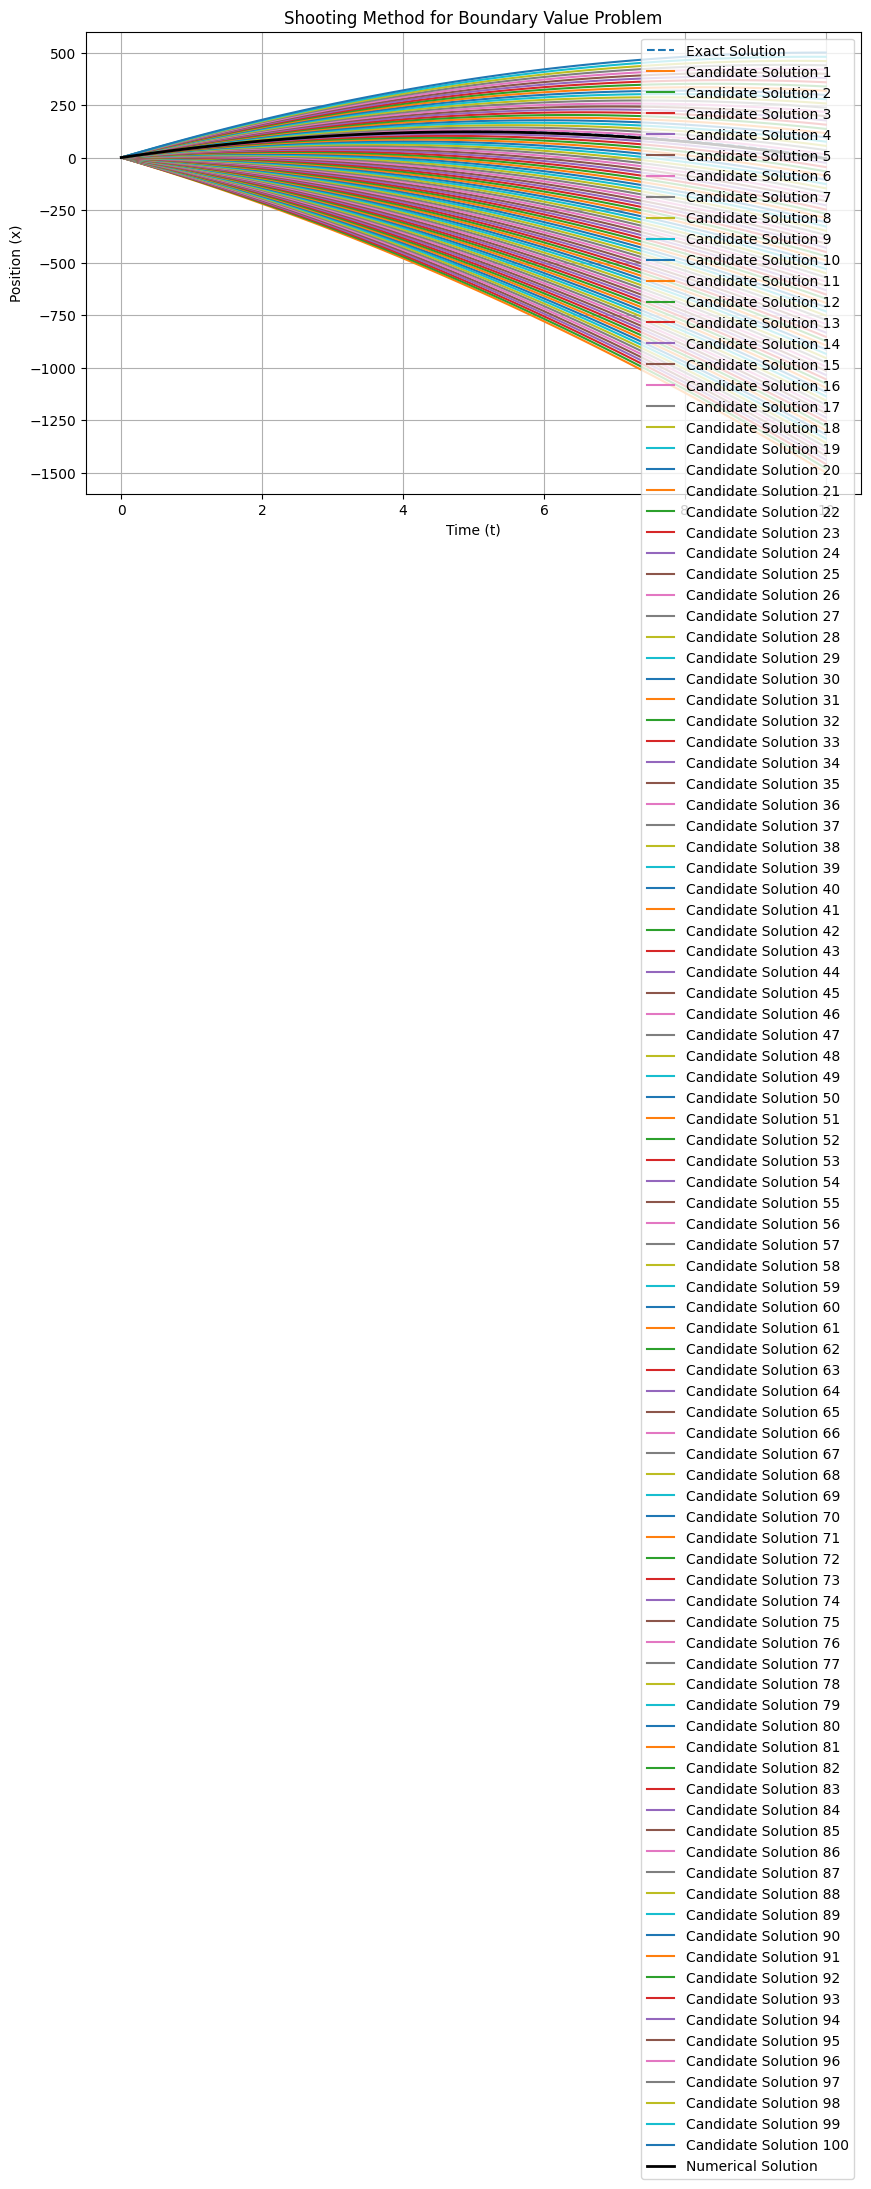

Closest candidate solution to zero at t = 10: Candidate Solution 75: -5.050505050504896


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the parameters
g = 10
t1 = 10

# Define the ODE system
def ode_system(t, y):
    x, v = y
    dxdt = v
    dvdt = -g
    return [dxdt, dvdt]

# Define the exact solution
def exact_solution(t):
    return -0.5 * g * t**2 + 0.5 * g * t1 * t

# Function to solve the ODE system for given initial conditions
def solve_ode(v0_guess):
    t_span = [0, t1]
    y0 = [0, v0_guess]
    sol = solve_ivp(ode_system, t_span, y0, t_eval=np.linspace(0, t1, 100))
    return sol.y[0]

# Function to compute the residual at the final time
def residual(v0_guess):
    x_numerical = solve_ode(v0_guess)
    x_exact = exact_solution(np.linspace(0, t1, 100))
    return np.abs(x_numerical[-1] - 0), x_numerical

# Shooting method
def shooting_method(num_candidates=100):# We can change it for better accuracy
    v0_guesses = np.linspace(-100, 100, num_candidates)  # Initial guesses for v0
    solutions = []
    residuals = []
    for v0_guess in v0_guesses:
        res, x_numerical = residual(v0_guess)
        residuals.append(res)
        solutions.append(x_numerical)
    min_residual_idx = np.argmin(residuals)
    return solutions[min_residual_idx], solutions, residuals

# Solve using shooting method
numerical_solution, candidate_solutions, residuals = shooting_method()

# Generate exact solution
t_exact = np.linspace(0, t1, 100)
x_exact = exact_solution(t_exact)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t_exact, x_exact, label='Exact Solution', linestyle='--')
for i, solution in enumerate(candidate_solutions):
    plt.plot(np.linspace(0, t1, 100), solution, label=f'Candidate Solution {i+1}')
plt.plot(np.linspace(0, t1, 100), numerical_solution, label='Numerical Solution', color='black', linewidth=2)
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Shooting Method for Boundary Value Problem')
plt.legend()
plt.grid(True)
plt.show()
# Find index of the closest solution to zero at t = 10
closest_solution_index = np.argmin(np.abs(candidate_solutions_at_t10))#{here we use np.argamin}
closest_solution_value = candidate_solutions_at_t10[closest_solution_index]

# Print the closest solution
print(f"Closest candidate solution to zero at t = 10: Candidate Solution {closest_solution_index + 1}: {closest_solution_value}")




By 2nd way by subtracting slopes.

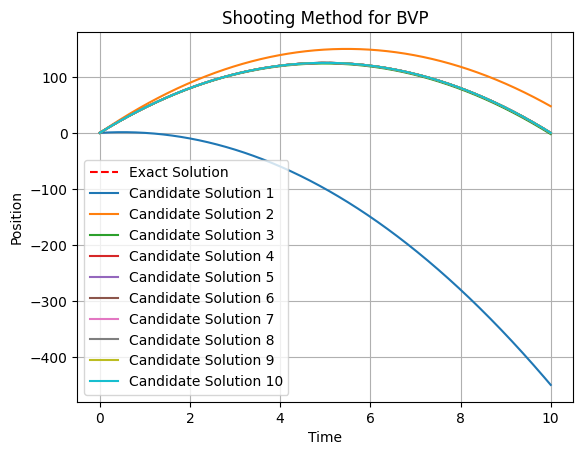

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the function representing the system of ODEs
def f(t, x):
    return np.array([x[1], -10])

# Define the exact solution function
def exact_solution(t, g, t1):
    return -0.5 * g * t**2 + 0.5 * g * t1 * t

# Parameters for shooting method
g = 10
t1 = 10
N = 1000
T = np.linspace(0, t1, N+1)
amax = 1000
amin = 5
an = 10
astep = (amax - amin) / an
itr = 10

# Plot the exact solution
plt.plot(T, exact_solution(T, g, t1), label="Exact Solution", linestyle='--', color='red')

# Shooting method iterations
for i in range(itr):
    ck = np.array([0])
    a = amin
    while a <= amax:
        # Solve the initial value problem for current guess of a
        sol = solve_ivp(f, [0, t1], [0, a], t_eval=[t1])
        # Compute deviation from zero at t=t1 and store
        ck = np.append(ck, abs(sol.y[0][0]))
        a += astep
    
    # Find the optimal a that minimizes deviation
    ck = ck[1:]
    at = amin + (astep * np.argmin(ck))
    
    # Solve the initial value problem with the optimal a
    s = solve_ivp(f, [0, t1], [0, at], t_eval=T)
    
    # Plot the candidate solution
    plt.plot(T, s.y[0], label=f"Candidate Solution {i+1}")

    # Update search range for next iteration
    amin = at - (astep / 2)
    amax = at + (astep / 2)
    astep = (amax - amin) / an

plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Shooting Method for BVP')
plt.legend()
plt.grid(True)
plt.show()
